# Walmart Challenge - EDA
## Treinamento Novos Piratas - NEU
### Juan Pablo Ibieta Jimenez - NUSP: 8291104

In [257]:
# imports
import numpy as np
import pandas as pd

# Data-Viz 
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
# import plotly.graph_objs as go
sns.set()
sns.set_style('white')



## Load Data

In [258]:
df = pd.read_csv('train.csv', parse_dates=[2])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


The dataset consist on 421570 rows containing weekly sales of Walmart's `(Store,Dept)` pairs from `2010-02-05` to `2012-10-26`. Additionally, the dataframe has a column named `IsHoliday`

In [259]:
print('Summary:\n shape: {}\n t_start: {}\n t_end: {}'.format(df.shape, df['Date'].min().date().strftime(format='%Y-%m-%d'), 
                                                        df['Date'].max().date().strftime(format='%Y-%m-%d')))
print('\nTypes:')
df.dtypes

Summary:
 shape: (421570, 5)
 t_start: 2010-02-05
 t_end: 2012-10-26

Types:


Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [260]:
#  Print basic statistics
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Check for NaN or null elements in the dataset, note that the number of falses equals the total number of rows for each column. In other words, no `NaN`

In [5]:
print('Checking for NaN values....')
for col in df.columns:
    print(df[col].isna().value_counts())

Checking for NaN values....
False    421570
Name: Store, dtype: int64
False    421570
Name: Dept, dtype: int64
False    421570
Name: Date, dtype: int64
False    421570
Name: Weekly_Sales, dtype: int64
False    421570
Name: IsHoliday, dtype: int64


## Exercício 1

Plote o gráfico do desempenho médio semanal (média de todas as lojas) ao longo do período catalogado. Qual é o melhor tipo de gráfico para expor essa informação? Por quê?

In [261]:
# Start by constructing the dataframe: group by Date and aggregate the Weekly_Sales column
by_date = df.sort_values('Date').groupby(['Date'], as_index=False).agg({'Weekly_Sales': ['mean', 'std', 'count']})
by_date.columns = by_date.columns.droplevel().map(str)
by_date.columns = ['Date', 'mean_weekly_sales', 'std_weekly_sales', 'count_weekly_sales']
by_date.head()


,Date,mean_weekly_sales,std_weekly_sales,count_weekly_sales
0,2010-02-05,16836.121997,25125.980371,2955
1,2010-02-12,16352.056032,22707.372063,2956
2,2010-02-19,16216.658979,22486.061153,2977
3,2010-02-26,14899.549688,21357.315432,2951
4,2010-03-05,15921.015727,22746.116429,2944


### Visualização
Claramente estamos lidando com uma serie temporal portanto o eixo `x` deve ser o tempo. Assim, considero que um plot de pontos (conectados) é a melhor escolha para este caso. As linhas conectando os pontos dão a noção do fluxo do tempo e da variação no valor de vendas mensais. 

In [262]:
# Criamos uma coluna nova que servirá de etiqueta para o eixo x
by_date['label']=pd.Series([by_date.Date[i].strftime('%m-%y') for i in range(len(by_date))])

Text(0.5, 1.0, 'Desempenho semanal médio (todas as lojas)')

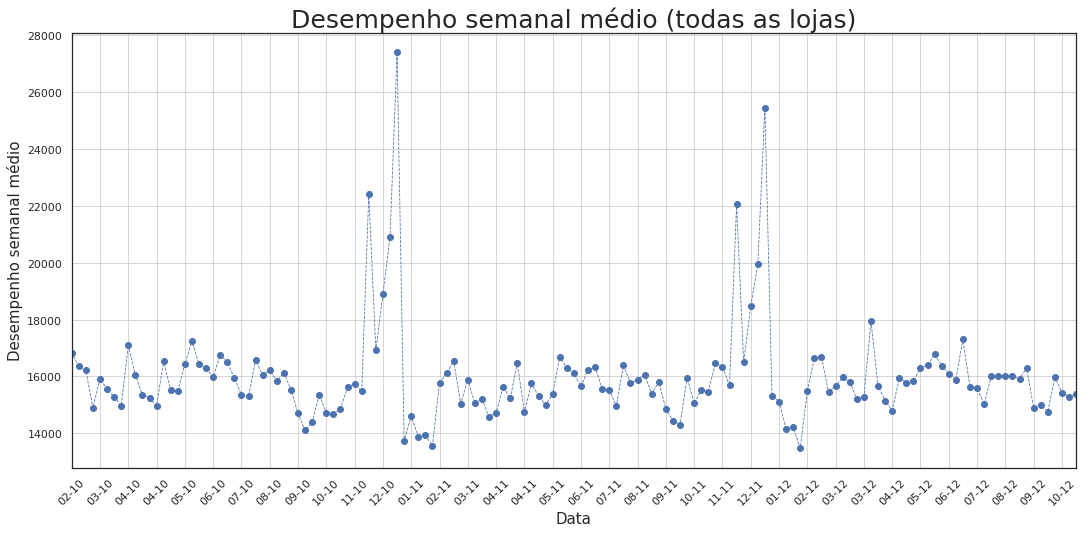

In [264]:
labels = [by_date['label'][i] for i in range(len(by_date)) if i %4 ==0]
majors = [by_date['Date'][i] for i in range(len(by_date)) if i %4 ==0]
plt.figure(figsize=(18,8))
plt.plot_date(by_date['Date'], by_date['mean_weekly_sales'], '--o', linewidth=0.8, xdate=True )
plt.grid(b=True, linewidth = 0.8)
plt.xlim(by_date['Date'][0],by_date['Date'][142])
plt.xticks(majors, labels, rotation =45)
plt.xlabel('Data', fontdict={'fontsize': '15'})
plt.ylabel('Desempenho semanal médio', fontdict= {'fontsize': '15'})
plt.title('Desempenho semanal médio (todas as lojas)', fontdict = {'fontsize':'25'})

## Exercicío 2
Encontre o conjunto de 10 lojas que melhor perfomaram. Plote o gráfico de desempenho médio dessas lojas no período disponível.

Começamos agrupando os dados por loja e tirando a média de vendas semanais por loja.

In [265]:
by_store = df.groupby(['Store'], as_index=False).agg({'Weekly_Sales': 'mean'})
by_store.columns = ['Store', 'mean_sales']
by_store.sort_values(by = 'mean_sales', inplace = True, ascending = False)
by_store.head()

,Store,mean_sales
19,20,29508.301592
3,4,29161.210415
13,14,28784.851727
12,13,27355.136891
1,2,26898.070031


In [266]:
# Choose the top 10 
top_10 = by_store[:10]

#  and the bottom 10
bottom_10 = by_store[-10:]

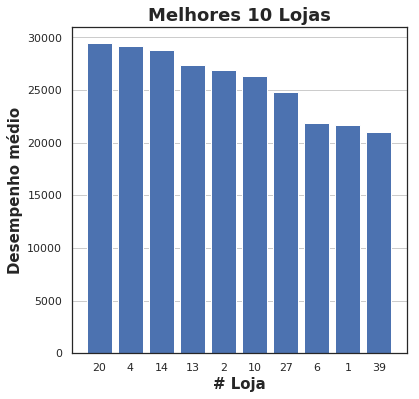

In [267]:
plt.figure(figsize=(6,6))
plt.bar(x=[x for x in range(10)], height = 'mean_sales', data= top_10, align = 'center')
plt.xticks([x for x in range(10)], [store for store in top_10['Store']])
plt.xlabel('# Loja', fontweight='bold', fontsize='15')
plt.ylabel('Desempenho médio', fontweight= 'bold', fontsize= '15')
plt.title('Melhores 10 Lojas', fontweight='bold', fontsize='18')
plt.grid(True, axis ='y')

## Exercicío 3
Faça o mesmo que foi proposto no exercício 2, mas agora com as 10 lojas que pior performaram.

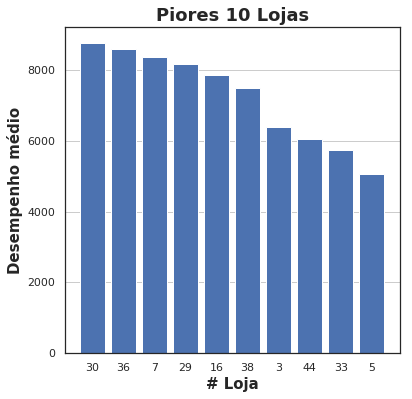

In [268]:
plt.figure(figsize=(6,6))
plt.bar(x=[x for x in range(10)], height = 'mean_sales', data= bottom_10, align = 'center')
plt.xticks([x for x in range(10)], [store for store in bottom_10['Store']])
plt.xlabel('# Loja', fontweight='bold', fontsize='15')
plt.ylabel('Desempenho médio', fontweight= 'bold', fontsize= '15')
plt.title('Piores 10 Lojas', fontweight='bold', fontsize='18')
plt.grid(True, axis='y')



In [269]:
[str(x) for x in bottom_10['Store']]

['30', '36', '7', '29', '16', '38', '3', '44', '33', '5']

Comparamos as melhores com as piores para ter uma idea do diferença em vendas entre elas

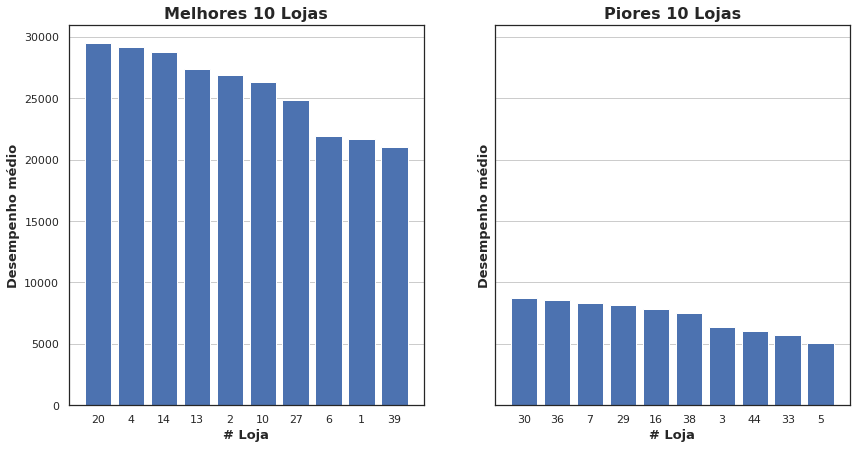

In [270]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize=(14,7))
ax[0].bar(x=[x for x in range(10)], height = 'mean_sales', data= top_10, align = 'center')
ax[0].set_xticks([x for x in range(10)])
ax[0].set_xticklabels([str(store) for store in top_10['Store']])
ax[0].set_xlabel('# Loja', fontweight='bold', fontsize='13')
ax[0].set_ylabel('Desempenho médio', fontweight= 'bold', fontsize= '13')
ax[0].set_title('Melhores 10 Lojas', fontweight='bold', fontsize='16')
ax[0].grid(True, axis='y')


ax[1].bar(x=[x for x in range(10)], height = 'mean_sales', data= bottom_10, align = 'center')
ax[1].set_xticks([x for x in range(10)])
ax[1].set_xticklabels([str(store) for store in bottom_10['Store']])
ax[1].set_xlabel('# Loja', fontweight='bold', fontsize='13')
ax[1].set_ylabel('Desempenho médio', fontweight= 'bold', fontsize= '13')
ax[1].set_title('Piores 10 Lojas', fontweight='bold', fontsize='16')
ax[1].grid(True, axis='y')


# Exercício 4

Dê o faturamento médio e mediano das lojas em semanas sem feriados. Faça o mesmo para as semanas com feriados.  Plote gráficos do desempenho médio com e sem feriados ao longo do período.
Feriados impactam negativa ou positivamente as vendas?


Usamos a coluna `IsHoliday` do dataframe para filtrar as semanas que tem feriado das que não tem.

In [61]:
holy_df = df[df['IsHoliday']]
unholy_df = df[~df['IsHoliday']]

Agora, podemos agrupar os dados por loja

In [271]:
# Holy set
holy_by_store = holy_df.sort_values(by= 'Date').groupby('Store', as_index= False).agg({'Weekly_Sales':['mean', 'median']})
holy_by_store.columns = holy_by_store.columns.droplevel().map(str)
holy_by_store.columns = ['Store', 'mean_w_sales', 'median_w_sales']

# Unholy set
unholy_by_store = unholy_df.sort_values(by= 'Date').groupby('Store', as_index= False).agg({'Weekly_Sales':['mean', 'median']})
unholy_by_store.columns = unholy_by_store.columns.droplevel().map(str)
unholy_by_store.columns = ['Store', 'mean_w_sales', 'median_w_sales']



Plotamos primeiro um gráfico de barras comparando as médias em semanas com feriado e as médias em semanas sem feriado. Para deixar mais clara a comparação, as diferenças entre as duas médias são plotadas logo em seguida.

(0, 46)

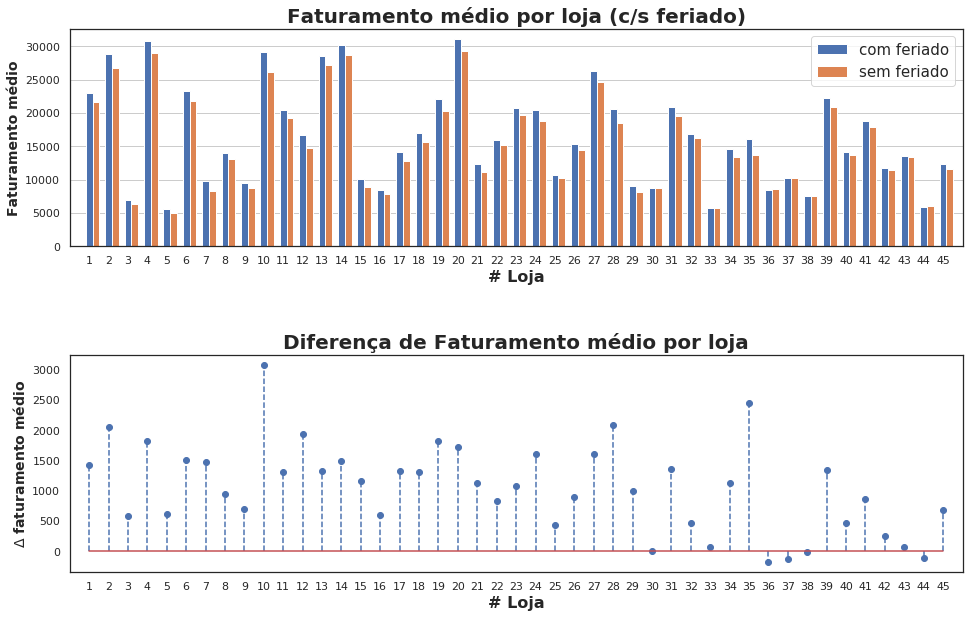

In [273]:
# Plot of mean weekly sales by store, where the mean is taken considering weeks with a holiday and without one separately.
fig, ax = plt.subplots(2, figsize=(16,10))
width=0.35
x = [x for x in holy_by_store.Store]
x = np.array(x)
# plt.figure(figsize=(16,8))
ax[0].bar(x , height = holy_by_store.mean_w_sales, width=width, align = 'center', label='com feriado')
ax[0].bar(x+ width, height = unholy_by_store.mean_w_sales, width= width, align = 'center', label = 'sem feriado')
ax[0].set_xlabel('# Loja', fontdict={'size': 16, 'weight': 'bold'} )
ax[0].set_xticks([x for x in holy_by_store.Store])
ax[0].set_ylabel('Faturamento médio', fontdict={'size':14, 'weight': 'bold'})
ax[0].set_title('Faturamento médio por loja (c/s feriado)', fontdict={'size': 20, 'weight': 'bold'})
ax[0].grid(True, axis='y')
ax[0].set_xlim(0, 46)
ax[0].legend(prop={'size': 15})
fig.subplots_adjust(hspace=0.5)
# plt the differences only
ax[1].stem(x, holy_by_store.mean_w_sales - unholy_by_store.mean_w_sales, linefmt= 'C0--' )
ax[1].set_xlabel('# Loja', fontdict={'size': 16, 'weight': 'bold'} )
ax[1].set_xticks([x for x in holy_by_store.Store])
ax[1].set_ylabel('$\Delta$ faturamento médio', fontdict={'size':14, 'weight': 'bold'})
ax[1].set_title('Diferença de Faturamento médio por loja', fontdict={'size': 20, 'weight': 'bold'})
ax[1].set_xlim(0, 46)


(0, 46)

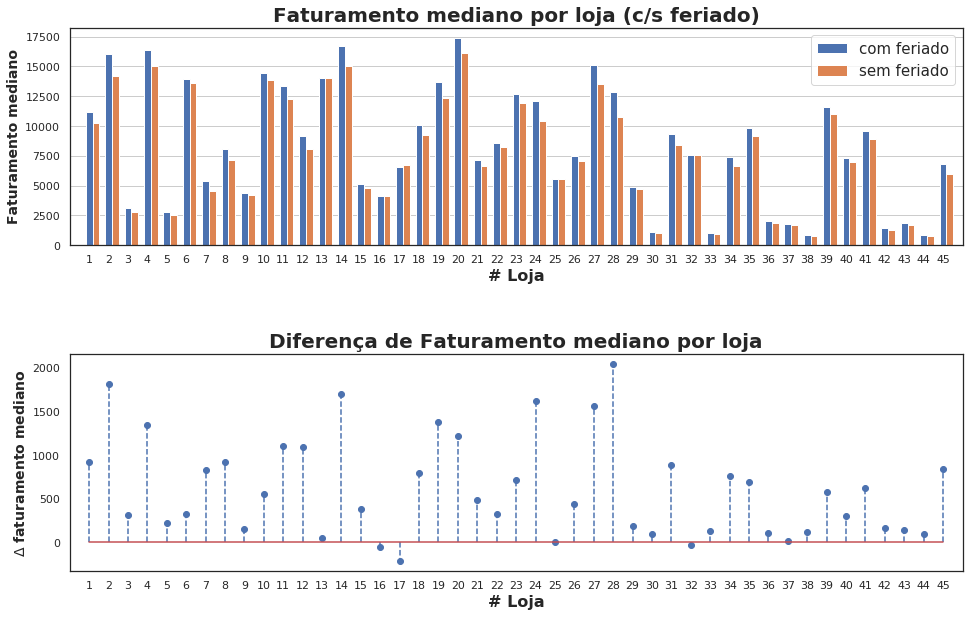

In [256]:
# Median weekly sales, for holiday and non-holiday weeks

# Plot of mean weekly sales by store, where the mean is taken considering weeks with a holiday and without one separately.
fig, ax = plt.subplots(2, figsize=(16,10))
width=0.35
x = [x for x in holy_by_store.Store]
x = np.array(x)
# plt.figure(figsize=(16,8))
ax[0].bar(x , height = holy_by_store.median_w_sales, width=width, align = 'center', label='com feriado')
ax[0].bar(x+ width, height = unholy_by_store.median_w_sales, width= width, align = 'center', label = 'sem feriado')
ax[0].set_xlabel('# Loja', fontdict={'size': 16, 'weight': 'bold'} )
ax[0].set_xticks([x for x in holy_by_store.Store])
ax[0].set_ylabel('Faturamento mediano', fontdict={'size':14, 'weight': 'bold'})
ax[0].set_title('Faturamento mediano por loja (c/s feriado)', fontdict={'size': 20, 'weight': 'bold'})
ax[0].grid(True, axis='y')
ax[0].set_xlim(0, 46)
ax[0].legend(prop={'size': 15})
fig.subplots_adjust(hspace=0.5)
# plt the differences only
ax[1].stem(x, holy_by_store.median_w_sales - unholy_by_store.median_w_sales, linefmt= 'C0--' )
ax[1].set_xlabel('# Loja', fontdict={'size': 16, 'weight': 'bold'} )
ax[1].set_xticks([x for x in holy_by_store.Store])
ax[1].set_ylabel('$\Delta$ faturamento mediano', fontdict={'size':14, 'weight': 'bold'})
ax[1].set_title('Diferença de Faturamento mediano por loja', fontdict={'size': 20, 'weight': 'bold'})
ax[1].set_xlim(0, 46)